In [127]:
import pickle
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import matplotlib.pyplot as plt 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [114]:
def load(name):
    file = open(name,'rb')
    data = pickle.load(file, encoding = 'bytes')
    file.close()
    return data


def open_and_merge_files(file1, file2 ,file3, file4, file5):
    train_labels = []
    data1 = load(file1)
    train_labels1 = np.asarray(data1[b'labels'])
    train_data1 = np.array(data1[b'data'])
    data2 = load(file2)
    train_labels2 = np.asarray(data2[b'labels'])
    train_data2 = np.array(data2[b'data'])
    data3 = load(file3)
    train_labels3 = np.asarray(data3[b'labels'])
    train_data3 = np.array(data3[b'data'])
    data4 = load(file4)
    train_labels4 = np.asarray(data4[b'labels'])
    train_data4 = np.array(data4[b'data'])
    data5 = load(file5)
    train_labels5 = np.asarray(data5[b'labels'])
    train_data5 = np.array(data5[b'data'])
    train_data = np.vstack((train_data1, train_data2, train_data3, train_data4, train_data5))
    train_labels = np.concatenate((train_labels1, train_labels2, train_labels3, train_labels4, train_labels5), axis=0)
    return train_labels, train_data


train_labels, train_data = open_and_merge_files("/home/jyoti/Documents/SMAI/assign2/Q1/cifar-10-python/cifar-10-batches-py/data_batch_1",
                           "/home/jyoti/Documents/SMAI/assign2/Q1/cifar-10-python/cifar-10-batches-py/data_batch_2",
                           "/home/jyoti/Documents/SMAI/assign2/Q1/cifar-10-python/cifar-10-batches-py/data_batch_3",
                           "/home/jyoti/Documents/SMAI/assign2/Q1/cifar-10-python/cifar-10-batches-py/data_batch_4",
                           "/home/jyoti/Documents/SMAI/assign2/Q1/cifar-10-python/cifar-10-batches-py/data_batch_5")


### Preprocessing Data - Normalizing Data

In [115]:
def normalize_data(train_data):
    normalized_train_data = normalize(train_data)
    return normalized_train_data

train_data = normalize_data(train_data)

### Preprocessing Data - PCA

In [116]:
def prepare_data_pca(train_data):
    pca_comp_num = PCA(n_components=100)
    pca_comp = pca_comp_num.fit_transform(train_data)
    data_frm_pca = pd.DataFrame(data = pca_comp)
    return data_frm_pca

train_data = prepare_data_pca(train_data)


### Split Train Data and Validation 

In [117]:
def train_validation_split(train_data, train_labels,validation_data_size):
       
        if isinstance(validation_data_size, float):
            validation_data_size=round(validation_data_size * len(train_data))
        n = len(train_data) - validation_data_size

        train_data_frm = train_data[:n]
        train_labels_rtn = train_labels[:n]
        validation_data_frm = train_data[n:]
        validation_labels = train_labels[n:]
        return train_data_frm, train_labels_rtn, validation_data_frm, validation_labels

train_data_frm, train_labels, validation_data_frm, validation_labels = train_validation_split(train_data, train_labels, validation_data_size=0.1)


### SVM

In [124]:
C_list = [1, 10,25, 50, 100]
acc_list = []
def run_svm(train_data, train_labels, validation_data, validation_labels):
        
#         for i in C_list:
        
#             obj = LinearSVC(C=i, multi_class='ovr')
            obj = LinearSVC(C=1, multi_class='ovr')
            obj.fit(train_data, train_labels)
            predict_values = obj.predict(validation_data)
#             acc_list.append(accuracy_score(predict_values, validation_labels))
            return predict_values
    
predict_values = run_svm(train_data_frm, train_labels, validation_data_frm, validation_labels)

### Plot C vs Accuracy Score

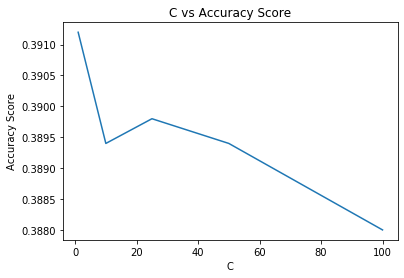

In [122]:
plt.plot(C_list, acc_list) 
plt.xlabel('C') 
plt.ylabel('Accuracy Score') 
plt.title('C vs Accuracy Score') 
plt.show()

## Performance Metrics

### 1. Accuracy Score

In [128]:
print("Accuracy Score = ", accuracy_score(validation_labels,predict_values))

Accuracy Score =  0.3912


### 2. F1 Score

In [129]:
print("F1 Score = ", f1_score(validation_labels,predict_values, average='micro', zero_division='warn'))

F1 Score =  0.3912


### 3. Confusion Matrix

In [130]:
print(confusion_matrix(validation_labels, predict_values))

[[233  25  11   7  16   8  14  25 116  38]
 [ 33 250   6   7   6  12  23  29  45  77]
 [ 71  28  78  13  62  39  89  37  46  16]
 [ 46  50  17 102  24  82  85  29  49  35]
 [ 45  22  39  13 144  28  94  48  20  22]
 [ 33  41  25  74  37 143  73  48  35  20]
 [ 20  26  22  20  49  24 265  14  21  27]
 [ 28  38  15  23  64  30  34 179  14  60]
 [ 81  42   3   3   4  10   5   8 320  56]
 [ 34 100   4  11   7   8  20  26  60 242]]


### 4. Classification Report

In [131]:
print(classification_report(validation_labels, predict_values))

              precision    recall  f1-score   support

           0       0.37      0.47      0.42       493
           1       0.40      0.51      0.45       488
           2       0.35      0.16      0.22       479
           3       0.37      0.20      0.26       519
           4       0.35      0.30      0.32       475
           5       0.37      0.27      0.31       529
           6       0.38      0.54      0.45       488
           7       0.40      0.37      0.39       485
           8       0.44      0.60      0.51       532
           9       0.41      0.47      0.44       512

    accuracy                           0.39      5000
   macro avg       0.39      0.39      0.38      5000
weighted avg       0.39      0.39      0.38      5000

